In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [13]:
data = np.loadtxt(open("heatmap.csv","r"),delimiter=",")

In [14]:
x = data[1:,0]

In [15]:
x


array([ 33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.])

In [16]:
y = data[0,1:]

In [17]:
Z = data[1:,1:]

In [11]:
'''flip the data so that the current is increasing from below'''
Z = np.flip(Z,0)

In [12]:
'''
gs = gridspec.GridSpec(1, 2,
                       width_ratios = [5,1],
                       )

#ax1 contains the polar heatmap
ax1 = plt.subplot(gs[0], aspect = 0.3)
#ax1.set_theta_zero_location("N")
#ax1.title.set_text('noise-floor heatmap')


#ax1.set_theta_direction(-1) #make it clockwise

#ax1.set_theta_offset(np.pi/2.0)

#ax2 contains the colour-value chart / colorbar.
ax2 = plt.subplot(gs[1])
ax2.title.set_text('visibility')

#Create a polar projection
#ax1 = plt.subplot(projection="polar")
#ax1 = plt.subplot(111)

'''
'''anything below or above vmin or vmax respectively will be replaced
    by vmin or vmax respectively 
'''    '''
# the colorbar is returned in im 
im = ax1.pcolormesh(X, Y, Z, vmin = -1, vmax = 1)

# If you dont want a fixed max - min range use the following instead
#im = ax1.pcolormesh(tv,rv,polar_values)

ax1.grid(True)
plt.colorbar(im, cax = ax2) #plot the colorbor bside the heatmap

plt.savefig("processed_heatmap"+".pdf") # save to file. other image formats are available. just change the suffics here. 
print ("output plot to file " + "processed_heatmap" + ".pdf")
plt.show() #display plot.'''

'anything below or above vmin or vmax respectively will be replaced\n    by vmin or vmax respectively \n\n# the colorbar is returned in im \nim = ax1.pcolormesh(X, Y, Z, vmin = -1, vmax = 1)\n\n# If you dont want a fixed max - min range use the following instead\n#im = ax1.pcolormesh(tv,rv,polar_values)\n\nax1.grid(True)\nplt.colorbar(im, cax = ax2) #plot the colorbor bside the heatmap\n\nplt.savefig("processed_heatmap"+".pdf") # save to file. other image formats are available. just change the suffics here. \nprint ("output plot to file " + "processed_heatmap" + ".pdf")\nplt.show() #display plot.'

In [49]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data,aspect="auto", vmax=1,vmin=-1, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=True, bottom=False,
    #               labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #         rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar



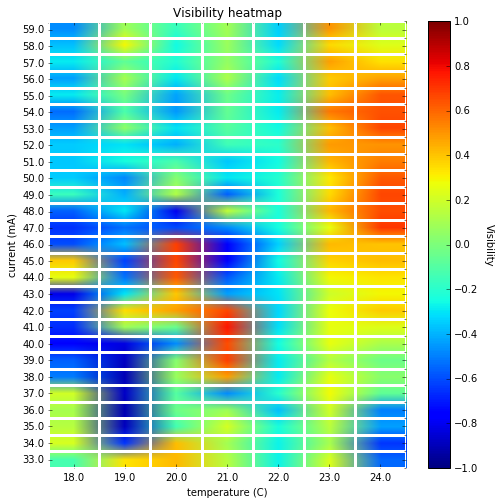

In [51]:
fig, bx = plt.subplots(figsize=(8, 8))


im, cbar = heatmap(Z, reversed(x.tolist()), y.tolist(), ax=bx,
                   cbarlabel="Visibility") #cmap="YlGn"

#fig.tight_layout()

plt.xlabel("temperature (C)")
plt.ylabel("current (mA)")
plt.title("Visibility heatmap")
plt.savefig("processed_heatmap.pdf") # save to file. other image formats are available. just change the suffics here. 
plt.show()

In [20]:
a = np.array([[1,2],[3,4],[5,6]])

In [21]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [23]:
np.flip(a,0)

array([[5, 6],
       [3, 4],
       [1, 2]])